# Stop and Shop Analysis

## Basic EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_coverage = pd.read_csv(r'stop_and_shop_files\hashed_users_activeness_2019-03-01_2019-09-01.csv') #touched up the date for this dateframe in excel, because it was importing weirdly.
df_visits = pd.read_csv(r'stop_and_shop_files\hashed_visits_Stop_&_Shop_2335_Dixwell_Ave_Hamden_CT_United_States_2019-03-01_2019-09-01.csv')


In [3]:
df_coverage.head()

,date,device_id,coverage
0,2019-03-01,1000,1.000000
1,2019-03-01,1001,1.000009
2,2019-03-01,1002,1.000000
3,2019-03-01,1003,1.000000
4,2019-03-01,1004,1.000000


In [4]:
df_coverage.dtypes

date          object
device_id      int64
coverage     float64
dtype: object

In [5]:
len(df_coverage)

355775

In [6]:
df_visits.head(5)

,device_id,visit_id,venue_id,visit_start_time,visit_end_time,visit_lat,visit_long,visit_weight,user_home_lat,user_home_long
0,1019,5c79e42c0c503906e8b3b5d1,4ceb1df9727f7ce6265b814d,3/1/2019 7:57,3/1/2019 9:12,41.371765,-72.913490,108.285336,41.363650,-72.948267
1,1019,5c7b3395e9628006650a438c,4ceb1df9727f7ce6265b814d,3/2/2019 9:47,3/2/2019 10:17,41.372513,-72.914375,108.870449,41.362900,-72.949111
2,1019,5c898582cd70f1062a24c5ef,4ceb1df9727f7ce6265b814d,3/12/2019 11:12,3/12/2019 12:22,41.372467,-72.914421,103.192100,41.363473,-72.948513
3,1019,5c8a21ef2c03970605518c11,4ceb1df9727f7ce6265b814d,13/03/2019 10:17,13/03/2019 11:34,41.372490,-72.914337,100.045183,41.365061,-72.948657
4,1019,5c8b12b2e144fd064c87092f,4ceb1df9727f7ce6265b814d,14/03/2019 11:24,14/03/2019 13:29,41.372398,-72.914154,99.676487,41.363355,-72.949214


In [7]:
df_visits.dtypes

device_id             int64
visit_id             object
venue_id             object
visit_start_time     object
visit_end_time       object
visit_lat           float64
visit_long          float64
visit_weight        float64
user_home_lat       float64
user_home_long      float64
dtype: object

In both dataframes, we have datetime columns, being read as objects. Need to convert to datetime data type.

## Coverage and Activity Analysis

#### What does the Users' Activity Look Like?
Select from the dataframe, only the 'Active Users'; those who's coverage is over .75%

In [8]:
dict_idx = df_coverage.to_dict('index')
dict_idx

{0: {'date': '2019-03-01', 'device_id': 1000, 'coverage': 1.0},
 1: {'date': '2019-03-01', 'device_id': 1001, 'coverage': 1.000009016},
 2: {'date': '2019-03-01', 'device_id': 1002, 'coverage': 1.0},
 3: {'date': '2019-03-01', 'device_id': 1003, 'coverage': 1.0},
 4: {'date': '2019-03-01', 'device_id': 1004, 'coverage': 1.0},
 5: {'date': '2019-03-01', 'device_id': 1005, 'coverage': 1.0},
 6: {'date': '2019-03-01', 'device_id': 1006, 'coverage': 1.0},
 7: {'date': '2019-03-01', 'device_id': 1007, 'coverage': 1.0},
 8: {'date': '2019-03-01', 'device_id': 1008, 'coverage': 1.0},
 9: {'date': '2019-03-01', 'device_id': 1010, 'coverage': 1.0},
 10: {'date': '2019-03-01', 'device_id': 1011, 'coverage': 1.0},
 11: {'date': '2019-03-01', 'device_id': 1012, 'coverage': 1.0},
 12: {'date': '2019-03-01', 'device_id': 1013, 'coverage': 1.0},
 13: {'date': '2019-03-01', 'device_id': 1014, 'coverage': 1.0},
 14: {'date': '2019-03-01', 'device_id': 1015, 'coverage': 1.0},
 15: {'date': '2019-03-01',

In [9]:
cleaned_dict = {k: v for k, v in dict_idx.items() if v['coverage'] >= .75}   
len(cleaned_dict) 

341015

In [10]:
group = {}
for k, v in cleaned_dict.items():
    group.setdefault(v['device_id'], 0)
    group[v['device_id']] +=1


Text(0, 0.5, 'Amount of users')

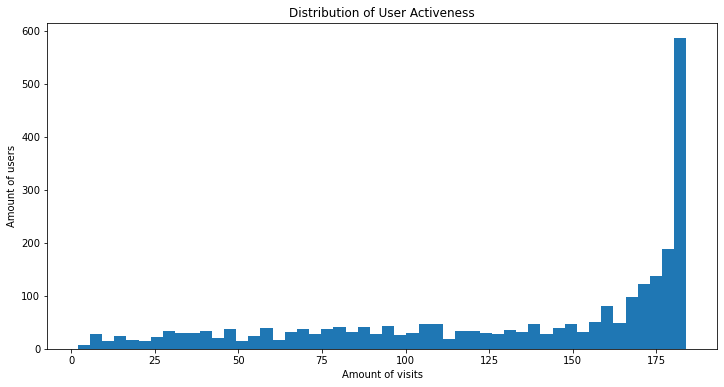

In [11]:
fig = plt.figure(figsize = (12,6))
plt.hist(group.values(), bins = 50);
plt.title('Distribution of User Activeness')
plt.xlabel('Amount of visits')
plt.ylabel('Amount of users')

The activeness distribution looks like some sort of joint porbability of a pareto/exponential (unclear at first glance), and a uniform distribution for values under 150.

### Visits per device

In [12]:
df_coverage_clean = pd.DataFrame(cleaned_dict).transpose()
df_coverage_clean

,date,device_id,coverage
0,2019-03-01,1000,1.0
1,2019-03-01,1001,1.000009
2,2019-03-01,1002,1.0
3,2019-03-01,1003,1.0
4,2019-03-01,1004,1.0
...,...,...,...
355770,2019-08-31,3584,1.0
355771,2019-08-31,3585,1.0
355772,2019-08-31,3586,1.0
355773,2019-08-31,3587,1.0


In [13]:
coverage_counts = df_coverage_clean.groupby('device_id').count()[['date']]


In [14]:
coverage_counts['active_days'] = coverage_counts.date
coverage_counts.drop('date', axis = 1, inplace = True)

In [15]:
## Filter Data Frames by Active Users-- Users who had 90+ active days
coverage_counts = coverage_counts.reset_index()
df_coverage = df_coverage_clean.merge(coverage_counts, on = 'device_id')
df_coverage = df_coverage[df_coverage.active_days >= 90]
df_coverage

,date,device_id,coverage,active_days
0,2019-03-01,1000,1.0,174
1,2019-03-02,1000,1.0,174
2,2019-03-03,1000,1.0,174
3,2019-03-06,1000,1.0,174
4,2019-03-07,1000,1.0,174
...,...,...,...,...
324714,2019-08-27,3246,1.0,90
324715,2019-08-28,3246,1.0,90
324716,2019-08-29,3246,1.0,90
324717,2019-08-30,3246,1.0,90


Text(0, 0.5, 'Amount of users')

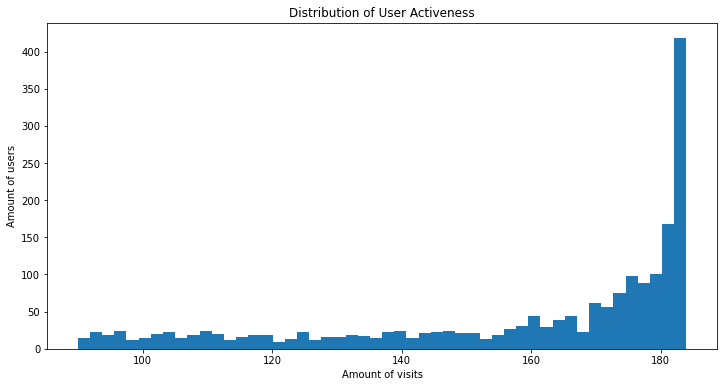

In [16]:
fig = plt.figure(figsize = (12,6))
counts= df_coverage.groupby('device_id')[['date']].count().sort_values('date', ascending = False)
counts.reset_index(inplace = True)
plt.hist(counts.date, bins = 50)
plt.title('Distribution of User Activeness')
plt.xlabel('Amount of visits')
plt.ylabel('Amount of users')

# Visits Analysis

In [17]:
active_users = np.unique(df_coverage.device_id) #Users who we decided were 'Active' in the previous section.
df_visits = df_visits.loc[df_visits.device_id.isin(active_users)] #Filter by active users

In [18]:
df_visits

,device_id,visit_id,venue_id,visit_start_time,visit_end_time,visit_lat,visit_long,visit_weight,user_home_lat,user_home_long
0,1019,5c79e42c0c503906e8b3b5d1,4ceb1df9727f7ce6265b814d,3/1/2019 7:57,3/1/2019 9:12,41.371765,-72.913490,108.285336,41.363650,-72.948267
1,1019,5c7b3395e9628006650a438c,4ceb1df9727f7ce6265b814d,3/2/2019 9:47,3/2/2019 10:17,41.372513,-72.914375,108.870449,41.362900,-72.949111
2,1019,5c898582cd70f1062a24c5ef,4ceb1df9727f7ce6265b814d,3/12/2019 11:12,3/12/2019 12:22,41.372467,-72.914421,103.192100,41.363473,-72.948513
3,1019,5c8a21ef2c03970605518c11,4ceb1df9727f7ce6265b814d,13/03/2019 10:17,13/03/2019 11:34,41.372490,-72.914337,100.045183,41.365061,-72.948657
4,1019,5c8b12b2e144fd064c87092f,4ceb1df9727f7ce6265b814d,14/03/2019 11:24,14/03/2019 13:29,41.372398,-72.914154,99.676487,41.363355,-72.949214
...,...,...,...,...,...,...,...,...,...,...
8757,2790,5d6b595a295be105e789c1d7,4ceb1df9727f7ce6265b814d,31/08/2019 14:08,31/08/2019 14:26,41.372375,-72.914162,63.873399,43.314187,-76.390449
8760,1149,5d6bb5c6a1b81405717aa4b9,4ceb1df9727f7ce6265b814d,31/08/2019 19:18,31/08/2019 19:44,41.372902,-72.914368,99.627435,42.599821,-74.052362
8761,2424,5d6bb9529fef9e061bab2b64,4ceb1df9727f7ce6265b814d,31/08/2019 19:18,31/08/2019 19:43,41.372963,-72.914467,99.627435,42.600452,-74.052375
8762,2450,5d6ba1f0b74ad6058c117e30,4ceb1df9727f7ce6265b814d,31/08/2019 20:33,31/08/2019 21:00,41.372215,-72.914886,114.104665,41.313369,-72.940362


Looking at the dataframe, There is a lot of anlaysis here to unpack. A rough outline of how to break it down:
* Basic Statistics
* Time Series Analysis
* Trip Length
* Trip Duration
* Time blocks (by month, by day of week)

### Basic Statistics

In [19]:
#Convert dates to datetype
df_visits.visit_start_time = pd.to_datetime(df_visits.visit_start_time)
df_visits.visit_end_time = pd.to_datetime(df_visits.visit_end_time)

In [20]:
df_visits['date'] = pd.to_datetime(df_visits.visit_start_time)
df_visits['month'] = df_visits.date.dt.month
df_visits['day'] = df_visits.date.dt.day

#### Visit Weight per User

In [21]:
print(f'average visit weight per user, per month: {(df_visits.groupby(["device_id"])["visit_weight"].sum() / len(np.unique(df_visits.month))).mean()}')

average visit weight per user, per month: 54.66780813064525


<AxesSubplot:ylabel='Frequency'>

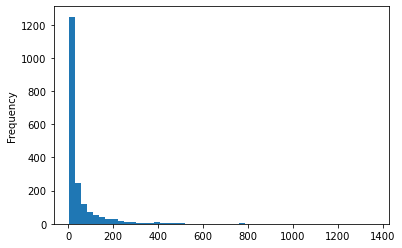

In [22]:
(df_visits.groupby('device_id')['visit_weight'].sum()/6).plot(kind = 'hist', bins = 50) #Pareto distributed

In [23]:

print(f'total amount of trips: {round(df_visits.visit_weight.sum())}')
total_days = (df_visits.visit_start_time.max() - df_visits.visit_start_time.min()).days
print(f'Amount of days for evaluation period: {total_days}')
print(f'total unique visitors {len(np.unique(df_visits.device_id))}')
# print(f'avg trip duration:{df_visits.visit_duration.mean()}')
# print(f'avg distance of trip: {df_visits.trip_distance.mean()}')
# print(f'avg coverage: {df_coverage.coverage.mean()}')
# print(f' {}')
# print(f' {}')
# print(f' {}')


total amount of trips: 633709
Amount of days for evaluation period: 183
total unique visitors 1932


In [24]:
df = pd.DataFrame()
df['Total Visits'] = [round(df_visits.visit_weight.sum())]
df['Unique Visitors'] = [len(np.unique(df_visits.device_id))]
df['Monthly Average'] = [round(df_visits.visit_weight.sum() / 6)] 
basic_stats = df
basic_stats

,Total Visits,Unique Visitors,Monthly Average
0,633709,1932,105618


Create a date column, with out the timestamp:

In [25]:
df_visits.loc[:, 'date'] = pd.to_datetime(df_visits.loc[:, 'visit_start_time']).dt.date #Create another column called date for this df, which takes just the date from the visit start time, and makes it into same structure as date in the other dataframe, for the merge

In [26]:
df_visits.visit_start_time = pd.to_datetime(df_visits.visit_start_time) #Convert to date time
df_visits.loc[:, 'date'] = df_visits.loc[:, 'visit_start_time'].dt.date #Create another column called date for this df, which takes just the date from the visit start time, and makes it into same structure as date in the other dataframe, for the merge
df_visits.loc[:, 'visit_end_time'] = pd.to_datetime(df_visits.visit_end_time)

## Time Series

In [27]:
df_time = df_coverage.loc[:, ['date', 'device_id']]
df_time.date = pd.to_datetime(df_time.date)
df_time.set_index('date', inplace = True)
df_time.device_id = np.ones(len(df_time.device_id))
df_time

,device_id
date,
2019-03-01,1.0
2019-03-02,1.0
2019-03-03,1.0
2019-03-06,1.0
2019-03-07,1.0
...,...
2019-08-27,1.0
2019-08-28,1.0
2019-08-29,1.0


In [28]:
df_visits

,device_id,visit_id,venue_id,visit_start_time,visit_end_time,visit_lat,visit_long,visit_weight,user_home_lat,user_home_long,date,month,day
0,1019,5c79e42c0c503906e8b3b5d1,4ceb1df9727f7ce6265b814d,2019-03-01 07:57:00,2019-03-01 09:12:00,41.371765,-72.913490,108.285336,41.363650,-72.948267,2019-03-01,3,1
1,1019,5c7b3395e9628006650a438c,4ceb1df9727f7ce6265b814d,2019-03-02 09:47:00,2019-03-02 10:17:00,41.372513,-72.914375,108.870449,41.362900,-72.949111,2019-03-02,3,2
2,1019,5c898582cd70f1062a24c5ef,4ceb1df9727f7ce6265b814d,2019-03-12 11:12:00,2019-03-12 12:22:00,41.372467,-72.914421,103.192100,41.363473,-72.948513,2019-03-12,3,12
3,1019,5c8a21ef2c03970605518c11,4ceb1df9727f7ce6265b814d,2019-03-13 10:17:00,2019-03-13 11:34:00,41.372490,-72.914337,100.045183,41.365061,-72.948657,2019-03-13,3,13
4,1019,5c8b12b2e144fd064c87092f,4ceb1df9727f7ce6265b814d,2019-03-14 11:24:00,2019-03-14 13:29:00,41.372398,-72.914154,99.676487,41.363355,-72.949214,2019-03-14,3,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8757,2790,5d6b595a295be105e789c1d7,4ceb1df9727f7ce6265b814d,2019-08-31 14:08:00,2019-08-31 14:26:00,41.372375,-72.914162,63.873399,43.314187,-76.390449,2019-08-31,8,31
8760,1149,5d6bb5c6a1b81405717aa4b9,4ceb1df9727f7ce6265b814d,2019-08-31 19:18:00,2019-08-31 19:44:00,41.372902,-72.914368,99.627435,42.599821,-74.052362,2019-08-31,8,31
8761,2424,5d6bb9529fef9e061bab2b64,4ceb1df9727f7ce6265b814d,2019-08-31 19:18:00,2019-08-31 19:43:00,41.372963,-72.914467,99.627435,42.600452,-74.052375,2019-08-31,8,31
8762,2450,5d6ba1f0b74ad6058c117e30,4ceb1df9727f7ce6265b814d,2019-08-31 20:33:00,2019-08-31 21:00:00,41.372215,-72.914886,114.104665,41.313369,-72.940362,2019-08-31,8,31


Weekly Visits

<AxesSubplot:xlabel='visit_start_time'>

<Figure size 1440x576 with 0 Axes>

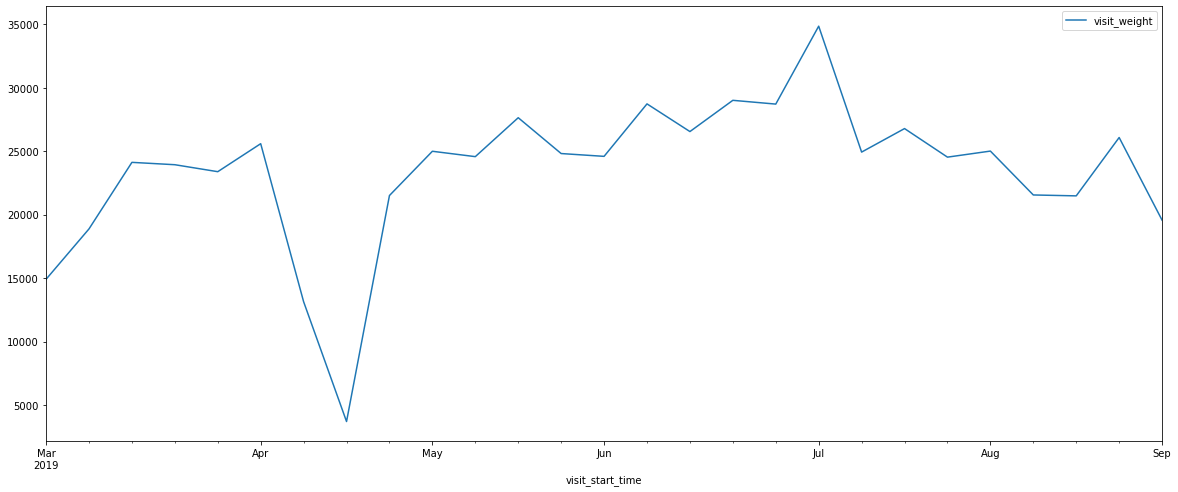

In [29]:
df_visits['month'] = pd.to_datetime(df_visits.visit_start_time).dt.month
df_time = df_visits.loc[:, ['visit_start_time', 'visit_weight']]
df_time.visit_start_time = pd.to_datetime(df_time.visit_start_time)
df_time.set_index('visit_start_time', inplace = True)

plt.figure(figsize = (20, 8))
df_time.sort_index(inplace = True)
# df_time.plot()
df_time.resample('W').sum().plot(figsize = (20,8))


This drop in April is intense... After researching turns out that the Stop and Shop workers in Conneticut actually [went on stike](https://www.nhregister.com/metro/article/Stop-Shop-workers-go-on-strike-in-CT-13759855.php) during this time. 

It could be suggested that the rest of our data anlaysis and number-crunching should take this into account, and adjust for th emonth of April. However, since all of the visitors would be affected uniformly, I don't think there is a need.

In [30]:
df_time

,visit_weight
visit_start_time,
2019-03-01 07:57:00,108.285336
2019-03-01 08:06:00,64.161804
2019-03-01 08:30:00,80.699429
2019-03-01 08:42:00,95.830928
2019-03-01 10:11:00,108.285336
...,...
2019-08-31 19:59:00,88.100711
2019-08-31 20:33:00,114.104665
2019-08-31 20:36:00,114.104665


### Trip Distance

Create distance column from the lat and long

In [31]:
from geopy.distance import geodesic

def distance_calc (row):
    start = (row['user_home_lat'], row['user_home_long'])
    # stop = (row['visit_lat'], row['visit_long'])
    stop = (41.3723654, -72.9141964)

    return geodesic(start, stop).km
df_visits['trip_distance'] = df_visits.apply( lambda row: distance_calc(row), axis = 1)
# time.dt.total_seconds() / 60
df_visits.head()

,device_id,visit_id,venue_id,visit_start_time,visit_end_time,visit_lat,visit_long,visit_weight,user_home_lat,user_home_long,date,month,day,trip_distance
0,1019,5c79e42c0c503906e8b3b5d1,4ceb1df9727f7ce6265b814d,2019-03-01 07:57:00,2019-03-01 09:12:00,41.371765,-72.913490,108.285336,41.363650,-72.948267,2019-03-01,3,1,3.010401
1,1019,5c7b3395e9628006650a438c,4ceb1df9727f7ce6265b814d,2019-03-02 09:47:00,2019-03-02 10:17:00,41.372513,-72.914375,108.870449,41.362900,-72.949111,2019-03-02,3,2,3.104604
2,1019,5c898582cd70f1062a24c5ef,4ceb1df9727f7ce6265b814d,2019-03-12 11:12:00,2019-03-12 12:22:00,41.372467,-72.914421,103.192100,41.363473,-72.948513,2019-03-12,3,12,3.036248
3,1019,5c8a21ef2c03970605518c11,4ceb1df9727f7ce6265b814d,2019-03-13 10:17:00,2019-03-13 11:34:00,41.372490,-72.914337,100.045183,41.365061,-72.948657,2019-03-13,3,13,2.995076
4,1019,5c8b12b2e144fd064c87092f,4ceb1df9727f7ce6265b814d,2019-03-14 11:24:00,2019-03-14 13:29:00,41.372398,-72.914154,99.676487,41.363355,-72.949214,2019-03-14,3,14,3.095969


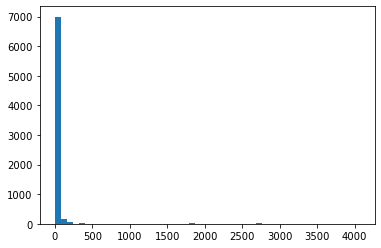

In [32]:
plt.hist(df_visits.trip_distance, bins = 50); #This is super heavily skewed. Definetly have a lot of outliers, so lets retry on the next line, by taking out those outliers.

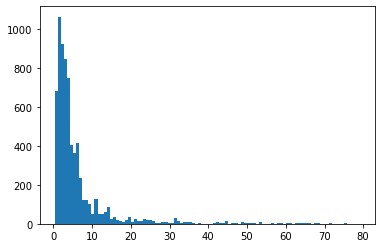

In [33]:
plt.hist(df_visits.trip_distance[df_visits.trip_distance <=df_visits.trip_distance.quantile(.95)], bins = 100); #anlayze the .95% quantile-- This is where most of the information is

The 95th percentile resembles a lognormal distribution, so the average here will give us a lot of information.

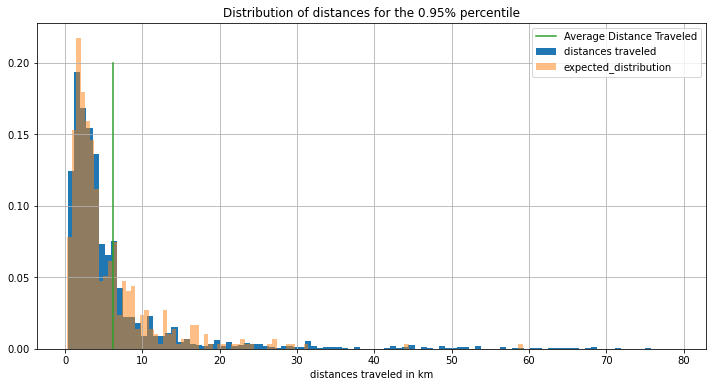

In [34]:
percent = .95
distances = df_visits.trip_distance[df_visits.trip_distance <=df_visits.trip_distance.quantile(percent)]
y = np.log(distances) #Take the logarithm of the data.
distances.hist(bins = 100, density = True, label = 'distances traveled')
z = pd.Series(np.random.normal(loc=y.mean(), scale=y.std(), size=500))

np.exp(z).hist(bins = 100, alpha = 0.5, density = True, label = 'expected_distribution', figsize = (12,6))
means = np.ones(1000)
means = means* np.mean(distances)

plt.plot(means, np.linspace(0,0.2,1000), label = 'Average Distance Traveled')
plt.xlabel('distances traveled in km')
plt.legend()
plt.title(f'Distribution of distances for the {percent}% percentile');

# x = np.logspace(0, 5, 200)
# pdf = lognorm.pdf(x, shape, loc, scale)

# ax.plot(x, pdf, 'y')

The above confirms that the distribution follows a lognormal distribution.

We can see that the distances pretty closely resmeble a lognormal distribution-- a normal distribution, going in the positive direction (as we can't have negative distances traveled).

Statistically, this shows us that around 68-70 % of the shoppers buy from within one standard deviation of the mean distance.

Looking at the graph, this shows us that a vast majority of the shoppers are coming from the general vicinity of the store

In [35]:
distances.mean() #Average distance in kilometers for the 95th percentile

6.1824883648340565

## Visit Duration

Create visit_duration column

In [36]:
df_visits['visit_duration'] = np.abs(df_visits.visit_end_time - df_visits.visit_start_time).dt.total_seconds() /  60 #create visit duration column

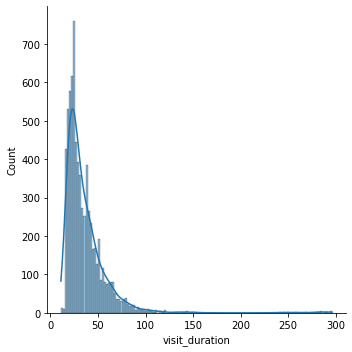

In [37]:
percent = .99 #99th percentile
sns.displot(df_visits.visit_duration[df_visits.visit_duration <= df_visits.visit_duration.quantile(percent)], kind = 'hist', kde = True)

In [38]:
visit_duration = df_visits.visit_duration[df_visits.visit_duration <= df_visits.visit_duration.quantile(percent)]
visit_duration

0        75.0
1        30.0
2        70.0
3        77.0
4       125.0
        ...  
8757     18.0
8760     26.0
8761     25.0
8762     27.0
8763     20.0
Name: visit_duration, Length: 7287, dtype: float64

In [39]:
visit_duration.mean() #average visit duration

36.80334842870866

We can see that the distances pretty closely resmeble a lognormal distribution-- a normal distribution, going in the positive direction (as we can't have negative distances traveled).

Statistically, this shows us that around 68-70 % of the shoppers buy from within one standard deviation of the mean distance.

Looking at the graph, this shows us that a vast majority of the shoppers are coming from the general vicinity of the store

### Time 

Hourly Visits

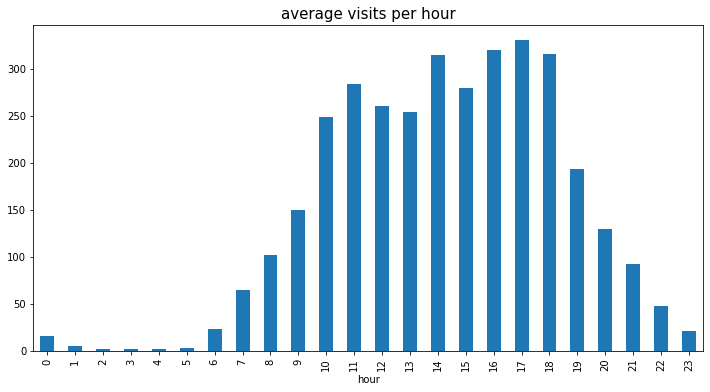

In [40]:
df_visits['hour'] = df_visits.visit_start_time.dt.hour
(df_visits.groupby('hour')['visit_weight'].sum() / total_days) .plot(kind = 'bar', figsize = (12,6))
plt.title('average visits per hour', size = 15)
byHour = df_visits.groupby('hour')['visit_weight'].sum() / total_days

Daily Visits

Text(0.5, 1.0, 'average visits per week')

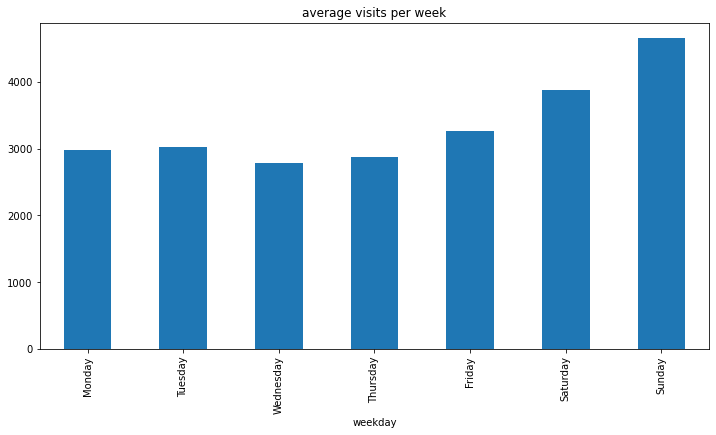

In [41]:
total_weeks = len(df_time.resample('w').count())

df_visits.date = pd.to_datetime(df_visits.visit_start_time)
df_visits['weekday'] = df_visits.visit_start_time.dt.weekday
df_visits['weekday_name'] = df_visits.weekday.replace({0: 'Monday', 1:'Tuesday', 2: 'Wednesday', 3:'Thursday', 4: 'Friday', 5:'Saturday', 6: 'Sunday'})
(df_visits.groupby('weekday')['visit_weight'].sum() / total_weeks) .plot(kind = 'bar', figsize = (12,6))
plt.xticks(np.arange(7), ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']);
plt.title('average visits per week')


In [42]:
byDay = round(df_visits.groupby('weekday')['visit_weight'].sum() / total_weeks, 0).astype(int)
byDay

weekday
0    2981
1    3028
2    2785
3    2880
4    3258
5    3886
6    4654
Name: visit_weight, dtype: int32

## Loyal Customer

How do we measure loyalty?

1) Consistency-- We can measure the variance of each customer on a month by month basis, to see how consistent of a shopper they are throughout the evaluation period.

2) Amount of visits per (insert time period)-- The downside of this, is that a customer could be penalized if they went on vacation, for example.

3) Distance to store. The idea would be to "reward" the loyalty metric by increasing. The closer someone is to the store, the less of a need to incentivize them with a loyalty program, because they will likely shop there anyways. The further the distance to the store, the more of a need to incentivize them with a loyalty program, to make sure to retain those customers. However, it would need to be combined with another metric, like visitation consistency. If a person is on a trip from california in the area once, without another metric, their loyalty will be heavily weighted, when we don't want them to be.

Going with the route mentioned in number 3, the metric we will create for loyalty will be the visit weight, divided by 1 + the normalized disstances (using min-max normalization to keep the values positive). The reason being, we want to reward amount of visits per user significantly, however we do want to factor in the distance in which the user has to travel. So if a user has only visited the store 8 times, but it involves him driving 20 miles, we want to be able to also factor that in somewhat. 

In regards to threshold, I placed the threshold for loaylty membership to be for those in the top 20th percentile. This is based off of the visitation weight distribution plotted above (and plotted again here):



<AxesSubplot:ylabel='Frequency'>

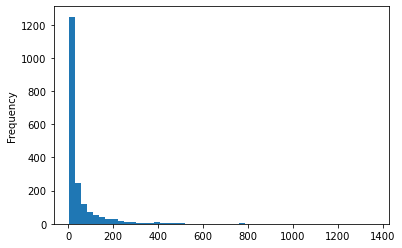

In [43]:
(df_visits.groupby('device_id')['visit_weight'].sum()/6).plot(kind = 'hist', bins = 50) #Pareto distributed

Pareto distributions tell us that around 80 percent of the information/values are found in the skew. Here this means, that 80% of the values are of the lowest visit weights. My assumption is, that generally we want to target the users who give higher weight (either this is because they are more frequent buyers, or that there few visits have some of the most impact).

(Note: It would be interesting to try hierarchical clustering, using scipy's dendrogram methods, to see if an outlier group gets created, that would make sense to be marked as the cluster of loyal customers.)

In [44]:
df_loyalty = df_visits.loc[:, ['device_id', 'visit_duration', 'trip_distance', 'visit_weight']]

In [45]:
normalized = (df_loyalty.trip_distance- df_loyalty.trip_distance.min())/(df_loyalty.trip_distance.max() -df_loyalty.trip_distance.min())
df_loyalty['normalized_distance'] = normalized
df_loyalty['weighted_sum'] = df_loyalty.visit_weight * (1+ df_loyalty.normalized_distance)

In [46]:
df_loyalty

,device_id,visit_duration,trip_distance,visit_weight,normalized_distance,weighted_sum
0,1019,75.0,3.010401,108.285336,0.000642,108.354856
1,1019,30.0,3.104604,108.870449,0.000665,108.942869
2,1019,70.0,3.036248,103.192100,0.000648,103.259006
3,1019,77.0,2.995076,100.045183,0.000638,100.109036
4,1019,125.0,3.095969,99.676487,0.000663,99.742579
...,...,...,...,...,...,...
8757,2790,18.0,358.530517,63.873399,0.088152,69.503968
8760,1149,26.0,165.778484,99.627435,0.040707,103.682948
8761,2424,25.0,165.836484,99.627435,0.040721,103.684371
8762,2450,27.0,6.908434,114.104665,0.001601,114.287403


In [47]:
loyalty = df_loyalty.groupby('device_id')[['weighted_sum']].sum()
loyalty.head(20)

,weighted_sum
device_id,
1000,35.484859
1001,76.167738
1002,121.242727
1003,70.101942
1005,28.554112
1007,46.492413
1008,129.562135
1010,66.996668
1011,74.551219


In [48]:
loyalty['loyalty'] = np.where(loyalty.weighted_sum >= np.quantile(loyalty.weighted_sum, .80), 'loyal', 'casual')

In [49]:
loyalty.head(20)

,weighted_sum,loyalty
device_id,,
1000,35.484859,casual
1001,76.167738,casual
1002,121.242727,casual
1003,70.101942,casual
1005,28.554112,casual
1007,46.492413,casual
1008,129.562135,casual
1010,66.996668,casual
1011,74.551219,casual


<AxesSubplot:>

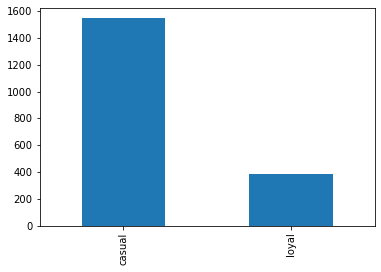

In [50]:
loyalty.loyalty.value_counts().plot(kind = 'bar')

In [51]:
df_visits = df_visits.merge(loyalty, on = 'device_id')

### Other questions

Is there any coorelation between trip distance and trip stay?

C:\Users\sfrie\anaconda3\envs\py4dp\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='visit_duration', ylabel='trip_distance'>

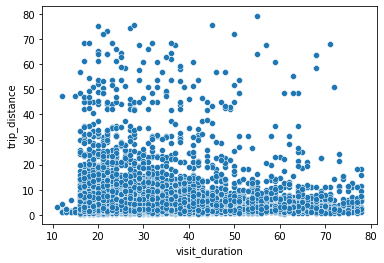

In [52]:
sns.scatterplot(df_visits.visit_duration[df_visits.visit_duration <=df_visits.visit_duration.quantile(.95)], df_visits.trip_distance[df_visits.trip_distance <=df_visits.trip_distance.quantile(.95)])

What are the most frequent places which people are coming to the store from? (Don't have enough information for this though)

No coorelation between the two....

### Export Datasets for Tableau Visualizations

In [53]:
basic_stats.to_csv('tableau_basic_stats.csv')
distances.to_csv('tableau_distance_95.csv')
visit_duration.to_csv('tableau_visit_duration.csv')
df_time.to_csv('tableau_timeSeries.csv')
byHour.to_csv('tableau_byHour.csv')
byDay.to_csv('tableau_byDay.csv')
loyalty.to_csv('tableau_loyalty.csv')
df_visits.to_csv('df_visits.csv')